#### Análisis Wine Quality

El dataset Wine Quality es ampliamente utilizado en análisis de datos y Machine Learning para predecir la calidad del vino en función de sus propiedades fisicoquímicas. Contiene datos de vinos tintos y blancos, con variables numéricas que describen sus características.

##### Variables y Características

El dataset tiene 11 variables de entrada y una variable de salida (quality), que es una calificación de la calidad del vino en una escala de 0 a 10. Las variables incluyen:

* `fixed acidity`: Acidez fija del vino.
* `volatile acidity`: Acidez volátil, que influye en el aroma.
* `citric acid`: Contenido de ácido cítrico.
* `residual sugar`: Cantidad de azúcares residuales.
* `chlorides`: Contenido de cloruros (sal).
* `free sulfur dioxide`: Dioxido de azufre libre.
* `total sulfur dioxide`: Dioxido de azufre total.
* `density`: Densidad del vino.
* `pH`: Nivel de acidez del vino.
* `sulphates`: Contenido de sulfatos.
* `alcohol`: Contenido de alcohol.
* `quality (target)`: Puntuación de calidad del vino (0-10).

Cargar librerias

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns

# Visualizacion
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Cargar Dataset

In [18]:
df_wine = pd.read_csv('datasets/WineQT.csv')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Realizar analisis inicial del DataFrame

In [4]:
# Ver informacion del dataset
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [7]:
# Ver dimensiones del dataset
df_wine.shape


(1143, 13)

In [8]:
# Imprimir peincipales esdisticas del data set
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [4]:
# Analisis o graficos adicionales que considere relevantes


Limpieza de Datos

In [ ]:
# Verificar Valores Nulos
df_wine.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,False,False,False,False,False,False,False,False,False,False,False,False,False
1139,False,False,False,False,False,False,False,False,False,False,False,False,False
1140,False,False,False,False,False,False,False,False,False,False,False,False,False
1141,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
# Eliminacion o imputracion de valores nulos si lo considera
df_wine_cleaned = df_wine.dropna()

Graficar el conteo o distribucion de la variable objetivo, es decir la Calidad del vino
 - Tener en cuenta que esta es una variable categórica, apesar de ser numerica.

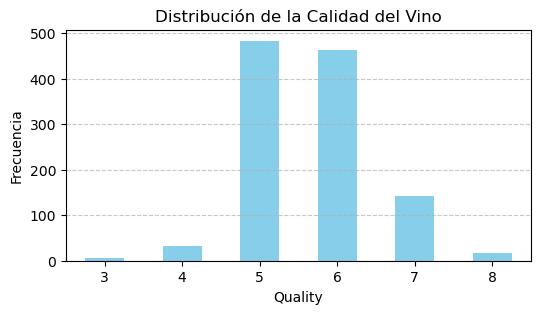

In [15]:
# Contar las ocurrencias de cada categoría en la columna 'quality'
quality_counts = df_wine['quality'].value_counts().sort_index()

# Graficar la distribución de la calidad del vino
plt.figure(figsize=(6, 3))
quality_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Quality')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Normalización de las variables numéricas para mejorar la eficiencia del modelo.

In [20]:
# Utilizar StandardScaler() para normalizar las variables que considere
# Separar las características de la variable objetivo
X = df_wine.drop('quality', axis=1)  # Variables independientes
y = df_wine['quality']               # Variable dependiente

# Inicializar el StandardScaler
scaler = StandardScaler()

# Ajustar y transformar las características
X_scaled = scaler.fit_transform(X)

# Convertir el resultado a un DataFrame para facilitar su uso
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Mostrar las primeras filas del DataFrame escalado
print(X_scaled_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.521580          0.939332    -1.365027       -0.466421  -0.231395   
1      -0.292593          1.941813    -1.365027        0.050060   0.234247   
2      -0.292593          1.273492    -1.161568       -0.171289   0.107253   
3       1.653789         -1.399789     1.483400       -0.466421  -0.252560   
4      -0.521580          0.939332    -1.365027       -0.466421  -0.231395   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.450467             -0.363610  0.555854  1.270695  -0.573658   
1             0.915920              0.643477  0.036165 -0.708928   0.130881   
2            -0.060071              0.246745  0.140103 -0.325775  -0.045254   
3             0.135127              0.429852  0.659792 -0.964363  -0.456235   
4            -0.450467             -0.363610  0.555854  1.270695  -0.573658   

    alcohol        Id  
0 -0.963382 -1.735618  
1 -0.593

Despues de la normalizacion visualice nuevamente las variables que considere necesarias

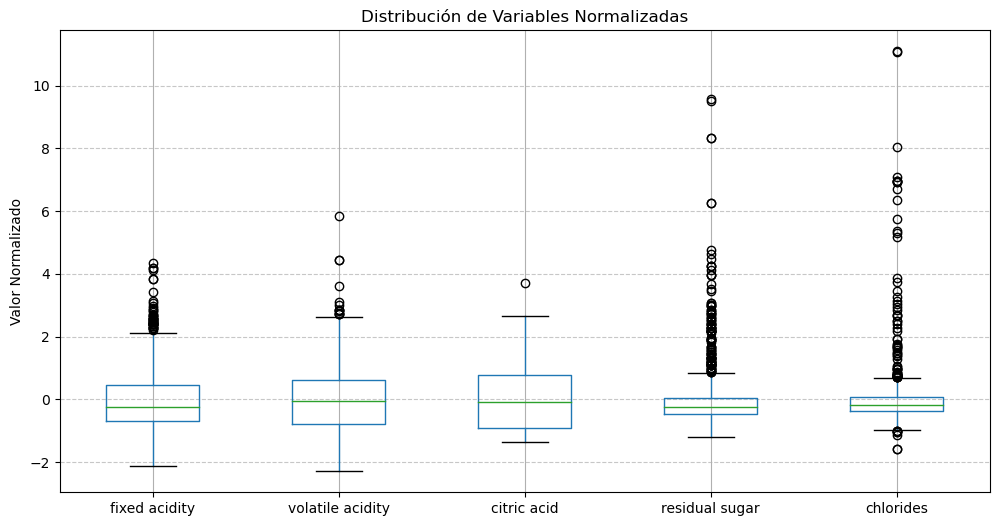

In [23]:
# Selecciona algunas columnas para visualizar
columnas_a_visualizar = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides']

# Crear un gráfico de caja para cada columna seleccionada
plt.figure(figsize=(12, 6))
X_scaled_df[columnas_a_visualizar].boxplot()
plt.title('Distribución de Variables Normalizadas')
plt.ylabel('Valor Normalizado')
# plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Elabore o visualice una Matriz de correlacion

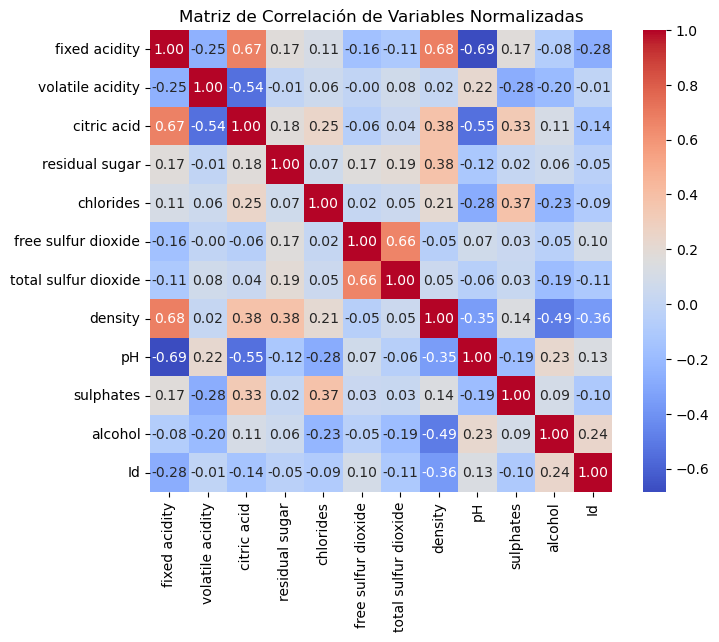

In [ ]:
# Calcula la matriz de correlación
correlation_matrix = X_scaled_df.corr()

# Configura el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crea un mapa de calor de la matriz de correlación, el .2f la f da el format al numero
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Añade títulos y etiquetas
plt.title('Matriz de Correlación de Variables Normalizadas')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Modelo y Evaluacion de los datos

In [31]:
# Division del dataset
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Mostrar el tamaño de los conjuntos de entrenamiento y prueba
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")

Tamaño del conjunto de entrenamiento: 914 muestras
Tamaño del conjunto de prueba: 229 muestras


* Entrenamoiento del modelo Utilice `RandomForestClassifier`
* Metricas de evaluacion utilice `accuracy_score` y `classification_report`

In [42]:
# Inicializar el modelo RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
rf_classifier.fit(X_train, y_train)

# Predecir las etiquetas del conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generar un informe de clasificación
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.69
Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.64      0.71      0.67        99
           7       0.75      0.58      0.65        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.42      0.41      0.41       229
weighted avg       0.67      0.69      0.67       229



c:\Users\jab1108\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jab1108\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jab1108\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluacion del Modelo

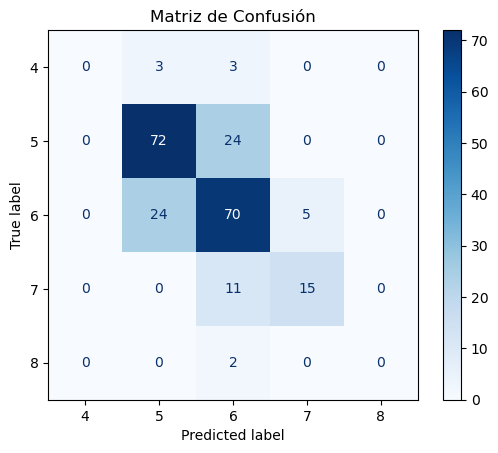

In [45]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Obtener las clases únicas de y_test para asegurarse de que las etiquetas coincidan
unique_classes = sorted(set(y_test))

# Mostrar la matriz de confusión con las etiquetas correctas
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_classes)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()